### Titanic 생존자 데이터셋 분석

In [1]:
import pandas as pd
import numpy as np

import seaborn as sb #파이썬 모듈 중 통계 시각화 라이브러리

titanic = sb.load_dataset('titanic')
print(type(titanic))  # DataFrame
# titanic.describe()
titanic

<class 'pandas.core.frame.DataFrame'>


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
# 성별 평균 생존율
# titanic[titanic['sex'].str.contains('female')]['survived'].mean()  # 233 , 0.74
# titanic[titanic['sex']=='male']['survived'].mean()   # 109, 0.188

titanic.pivot_table('survived','sex',aggfunc='mean')
# titanic.pivot_table(values='survived',index='sex',aggfunc='mean')

# DataFrame.pivot_table(
#     values=None,
#     index=None,
#     columns=None,
#     aggfunc='mean',
#     fill_value=None,
#     margins=False,
#     dropna=True,
#     margins_name='All',
#     observed=False,
# ) 

,survived
sex,
female,0.742038
male,0.188908


In [3]:
#  'pclass' 별 평균 생존율
titanic.pivot_table('survived','pclass',aggfunc='mean')

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [4]:
# 'embark_town' 별 평균 생존율
res=titanic.pivot_table('survived','embark_town',aggfunc='mean')
res

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [5]:
# 'class','sibsp' 를 MultiIndex로 group화 하고 컬럼을 'sex'로 하는 생존율(평균)
titanic.pivot_table('survived',index=['class','sibsp'],
                    columns='sex',aggfunc='mean')

sex             female      male
class  sibsp                    
First  0      0.979592  0.329545
       1      0.950000  0.483871
       2      1.000000  0.500000
       3      1.000000  0.000000
Second 0      0.931818  0.118421
       1      0.892857  0.259259
       2      1.000000  0.200000
       3      1.000000       NaN
Third  0      0.592593  0.129630
       1      0.447368  0.222222
       2      0.571429  0.125000
       3      0.125000  0.000000
       4      0.333333  0.083333
       5      0.000000  0.000000
       8      0.000000  0.000000

In [6]:
# 'age'로 등급별 생존율 구하기
titanic['age'].min()  # 0.42
titanic['age'].max()  # 80.0
titanic['age'].mean() # 29.69

# titanic.pivot_table('survived','age',aggfunc='mean')

# 'age'를 5단계로 출력
pd.qcut(titanic.age,5)

# '(': parentheses is exclusive. 불포함, 초과, '>'
# '[': square bracket is inclusive; 포함, 이하, '<='
# [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]
#   'child'         'young'         'middle'       'old'          'very old'

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
886     (25.0, 31.8]
887    (0.419, 19.0]
888              NaN
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: age, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [7]:
titanic['age_class'] = pd.qcut(titanic.age,5,
                       labels=['child','young','middle','old','very old'])
titanic['age2'] = titanic['age']
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class,age2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle,26.0


In [8]:
# 'age_class', 5단계 연령 등급별 생존율
titanic.pivot_table('survived','age_class',aggfunc='mean')

,survived
age_class,
child,0.481707
young,0.328467
middle,0.393701
old,0.437500
very old,0.373239


In [9]:
# 'sex','age_class' 를 MultiIndex로 한 평균 생존율
titanic.pivot_table('survived',index=['sex','age_class'],aggfunc='mean')

survived
sex    age_class          
female child      0.706667
       young      0.723404
       middle     0.727273
       old        0.843137
       very old   0.795455
male   child      0.292135
       young      0.122222
       middle     0.216867
       old        0.215054
       very old   0.183673

In [10]:
# 분포의 갯수
titanic['age_class'].value_counts()

age_class
child       164
old         144
very old    142
young       137
middle      127
Name: count, dtype: int64

In [11]:
# Series 객체의 quantile()함수: 데이터의 백분위수
titanic['age'].quantile([.0,.2,.4,.6,.8,1.0])

# [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]
#   'child'         'young'         'middle'       'old'          'very old'

0.0     0.42
0.2    19.00
0.4    25.00
0.6    31.80
0.8    41.00
1.0    80.00
Name: age, dtype: float64

In [12]:
titanic['age'].median() ,titanic['age'].mean()

(28.0, 29.69911764705882)

28.0

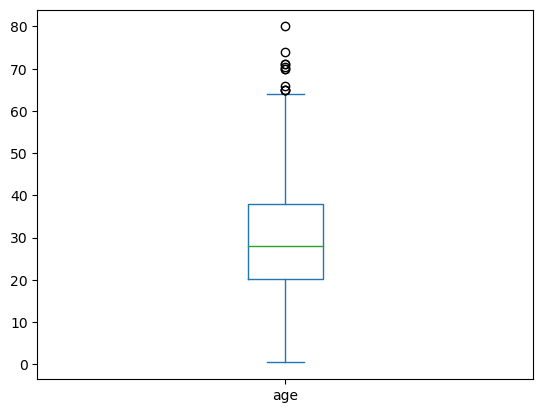

In [13]:
# 사분위수 시각화 : box plot (상자그림)
titanic['age'].plot.box() #분위수 _ 최소값, 1분위(Q1),중앙값,3분위(Q3),최대값
titanic['age'].median()

#박스 : 상자의 하단, 상단은 1분위(Q1) 3분위(Q3)
#수염 : 가변성 표시(IQR, Q3-Q1의 1.5배)
#이상치 : 데이터의 특이한 관측점이다

In [14]:
# qcut()을 사용하여 fare 를 3단계로 분류된 'fare_class'컬럼을 추가
# label : 'First' ,'Second', 'Third'
# 'class'를 복사하여 새로운 컬럼 'class2'로 추가하고 결과를 비교
# 'fare_class' , 3단계 요금 등급별 생존율을 구하기
titanic['fare_class'] = pd.qcut(titanic.fare,3,
                         labels=['Third','Second','First'])
titanic['class2'] = titanic['class']
titanic
# pd.qcut(titanic.fare,3)
# [(-0.001, 8.662] < (8.662, 26.0] < (26.0, 512.329]]
#       'Third'         'Second'         'First'

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class,age2,fare_class,class2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,22.0,Third,Third
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old,38.0,First,First
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle,26.0,Third,Third
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old,35.0,First,First
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old,35.0,Third,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle,27.0,Second,Second
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,19.0,First,First
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN,Second,Third
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle,26.0,First,First


In [15]:
# 'fare_class', 3단계 요금 등급별 생존율
titanic.pivot_table('survived','fare_class',aggfunc='mean')

,survived
fare_class,
Third,0.198052
Second,0.402778
First,0.559322


In [16]:
# 'fare_class'의 분포의 갯수
titanic['fare_class'].value_counts()

fare_class
Third     308
First     295
Second    288
Name: count, dtype: int64

In [17]:
# 생존한 사람중에서 'fare_class'가 'third'인 사람이 몇명인지 구하기 : 62
sv_df = titanic[titanic['survived'] == 1]
sv_df['fare_class'].value_counts()

fare_class
First     165
Second    116
Third      61
Name: count, dtype: int64

In [18]:
# 컬럼을 중간에 삽입하는 방법 : DataFrame.insert(컬럼번호,컬럼이름,추가될 컬럼데이터)
df = titanic.copy()
df.insert(4,'age_class_insert',df['age_class'])
df

,survived,pclass,sex,age,age_class_insert,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class,age2,fare_class,class2
0,0,3,male,22.0,young,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,22.0,Third,Third
1,1,1,female,38.0,old,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old,38.0,First,First
2,1,3,female,26.0,middle,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle,26.0,Third,Third
3,1,1,female,35.0,old,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old,35.0,First,First
4,0,3,male,35.0,old,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old,35.0,Third,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,middle,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle,27.0,Second,Second
887,1,1,female,19.0,child,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,19.0,First,First
888,0,3,female,NaN,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN,Second,Third
889,1,1,male,26.0,middle,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle,26.0,First,First


In [19]:
# 상관 관계(Correlation): 피쳐(X값,독립변수),Y값(종속변수,레이블,답)들과의 영향을 주는 정도
titanic.select_dtypes(include=[np.number]).corr() # 상관 계수 : (-1 ~ 1) , 0 이 가장 작은값, 0.5이상이면 상관관계가 크다  

,survived,pclass,age,sibsp,parch,fare,age2
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.077221
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.369226
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.308247
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.189119
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.096067
age2,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000
